In [1]:
import pandas as pd
import numpy as np
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import seaborn as sns

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from skimage.io import imread
%matplotlib inline

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

In [2]:
from os import listdir
from os.path import join, isfile
files = listdir("../datasets/Dataset_BUSI")
print(len(files))

4


Citation : Al-Dhabyani W, Gomaa M, Khaled H, Fahmy A. Dataset of breast ultrasound images. Data in Brief. 2020 Feb;28:104863. DOI: 10.1016/j.dib.2019.104863.

In [4]:
base_path = "../datasets/Dataset_BUSI"
folder = listdir(base_path)
len(folder)

4

In [14]:
#run only once!!!!!
import shutil
folders = ['benign', 'normal', 'malignant']
for f in folders:
    dir_path = base_path + "/" + f
    mask_dir_path = dir_path + '/mask/'
    original_dir_path = dir_path + '/original/'

        
    for file in listdir(dir_path):
        if "_mask" in file:
         # check if directory exists or not yet
            if not os.path.exists(mask_dir_path):
                os.makedirs(mask_dir_path)

            if os.path.exists(mask_dir_path):  
                # move files into created directory
                shutil.move(os.path.join(dir_path, file), mask_dir_path)
        else:
            # check if directory exists or not yet
            if not os.path.exists(original_dir_path):
                os.makedirs(original_dir_path)

            if os.path.exists(original_dir_path):            
                # move files into created directory
                shutil.move(os.path.join(dir_path, file), original_dir_path)


file_path: ../datasets/Dataset_BUSI/benign/mask/benign (246)_mask.png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (328).png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (282).png
file_path: ../datasets/Dataset_BUSI/benign/mask/benign (136)_mask.png
file_path: ../datasets/Dataset_BUSI/benign/mask/benign (300)_mask.png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (144).png
file_path: ../datasets/Dataset_BUSI/benign/mask/benign (87)_mask.png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (82).png
file_path: ../datasets/Dataset_BUSI/benign/mask/benign (185)_mask.png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (390).png
file_path: ../datasets/Dataset_BUSI/benign/mask/benign (34)_mask.png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (113).png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (406).png
file_path: ../datasets/Dataset_BUSI/benign/original/benign (369).png
file_path: ../datasets/Dataset_

file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (103).png
file_path: ../datasets/Dataset_BUSI/malignant/mask/malignant (117)_mask.png
file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (6).png
file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (154).png
file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (92).png
file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (123).png
file_path: ../datasets/Dataset_BUSI/malignant/mask/malignant (79)_mask.png
file_path: ../datasets/Dataset_BUSI/malignant/mask/malignant (8)_mask.png
file_path: ../datasets/Dataset_BUSI/malignant/mask/malignant (141)_mask.png
file_path: ../datasets/Dataset_BUSI/malignant/mask/malignant (188)_mask.png
file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (174).png
file_path: ../datasets/Dataset_BUSI/malignant/mask/malignant (17)_mask.png
file_path: ../datasets/Dataset_BUSI/malignant/original/malignant (162).png
file_path: ../datasets/Dat

In [17]:
total_images = 0
folders = ['benign','malignant','normal']

for f in folders:
    original_path = base_path + "/" + f +"/original"
    total_images += len(listdir(original_path))
        

In [18]:
total_images

783

In [35]:
data = pd.DataFrame(index=np.arange(0, total_images), columns=["patient_id", "path", "target"])

k = 0
for f in folders:
    original_path = base_path + "/" + f +"/original"
    subfiles = listdir(original_path)
    for m in range(len(subfiles)):        
        data.iloc[k]["path"] = original_path +"/" + subfiles[m]
        data.iloc[k]["target"] = f
        data.iloc[k]["patient_id"] = m
        k += 1

data.head()

,patient_id,path,target
0,0,../datasets/Dataset_BUSI/benign/original/benig...,benign
1,1,../datasets/Dataset_BUSI/benign/original/benig...,benign
2,2,../datasets/Dataset_BUSI/benign/original/benig...,benign
3,3,../datasets/Dataset_BUSI/benign/original/benig...,benign
4,4,../datasets/Dataset_BUSI/benign/original/benig...,benign


In [36]:
data.head(50)

,patient_id,path,target
0,0,../datasets/Dataset_BUSI/benign/original/benig...,benign
1,1,../datasets/Dataset_BUSI/benign/original/benig...,benign
2,2,../datasets/Dataset_BUSI/benign/original/benig...,benign
3,3,../datasets/Dataset_BUSI/benign/original/benig...,benign
4,4,../datasets/Dataset_BUSI/benign/original/benig...,benign
5,5,../datasets/Dataset_BUSI/benign/original/benig...,benign
6,6,../datasets/Dataset_BUSI/benign/original/benig...,benign
7,7,../datasets/Dataset_BUSI/benign/original/benig...,benign
8,8,../datasets/Dataset_BUSI/benign/original/benig...,benign
9,9,../datasets/Dataset_BUSI/benign/original/benig...,benign


In [37]:
# Label encoding the outcomes
data['target'].replace(["normal", "benign", "malignant"],[0,1,2], inplace = True)

In [38]:
data

,patient_id,path,target
0,0,../datasets/Dataset_BUSI/benign/original/benig...,1
1,1,../datasets/Dataset_BUSI/benign/original/benig...,1
2,2,../datasets/Dataset_BUSI/benign/original/benig...,1
3,3,../datasets/Dataset_BUSI/benign/original/benig...,1
4,4,../datasets/Dataset_BUSI/benign/original/benig...,1
...,...,...,...
778,129,../datasets/Dataset_BUSI/normal/original/norma...,0
779,130,../datasets/Dataset_BUSI/normal/original/norma...,0
780,131,../datasets/Dataset_BUSI/normal/original/norma...,0
781,132,../datasets/Dataset_BUSI/normal/original/norma...,0


In [39]:
data.target = data.target.astype(np.int)

In [40]:
ben_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False)
nor_selection = np.random.choice(data[data.target==0].index.values, size=50, replace=False)
mal_selection = np.random.choice(data[data.target==1].index.values, size=50, replace=False)


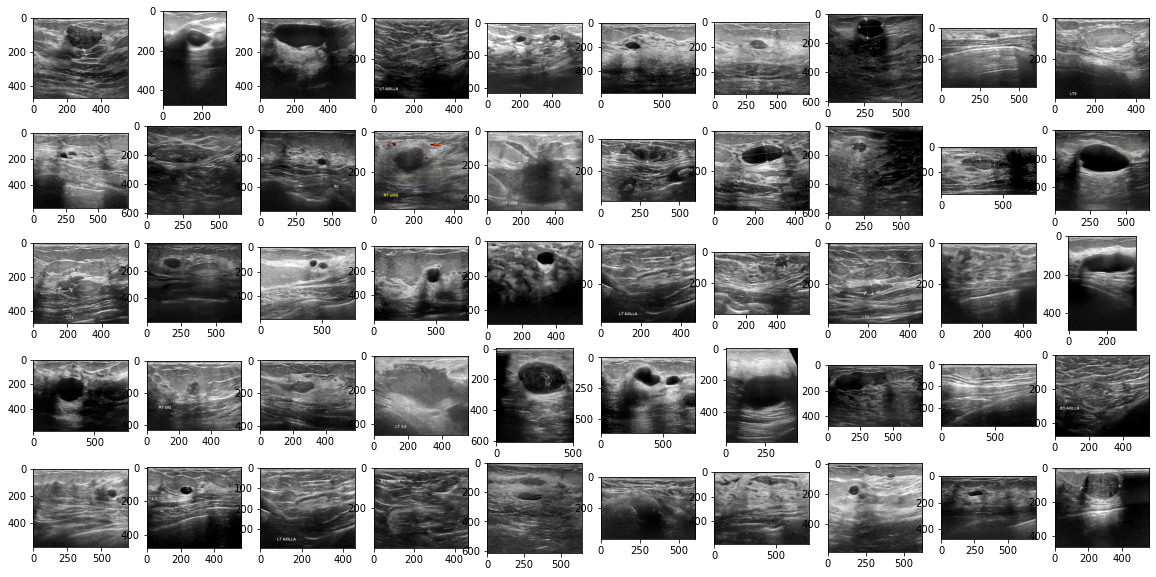

In [41]:
fig, ax = plt.subplots(5,10,figsize=(20,10))

for n in range(5):
    for m in range(10):
        idx = ben_selection[m + 10*n]
        image = imread(data.loc[idx, "path"])
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

In [ ]:
#Rename and shuffle before classification to prevent data leakage